# Otimizing Energy Efficiency: Predictive Modeling Using Regression Techniques

## Experiment 1: Data Understanding

First few rows of the dataset:
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28

Missing values in each column:
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

Dataset summary:
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000 

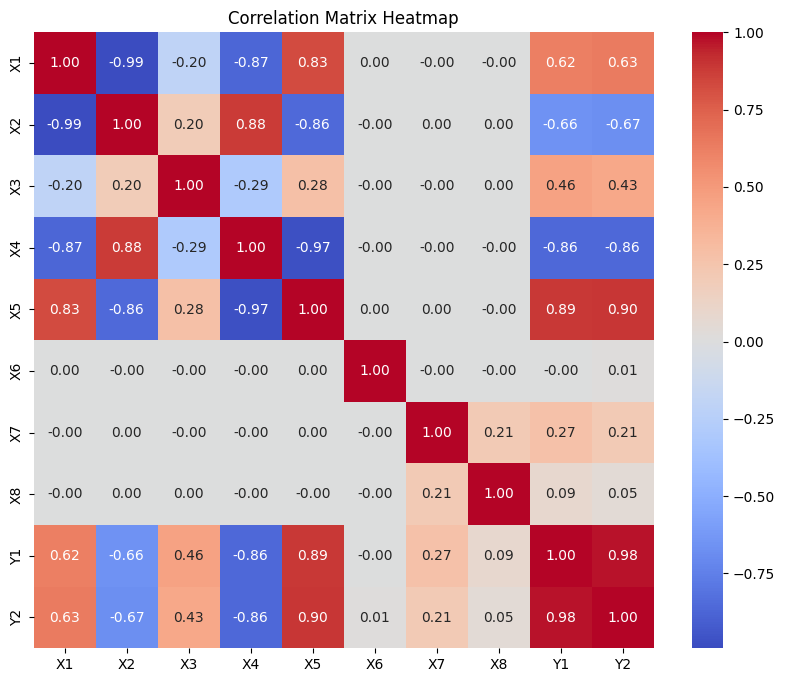

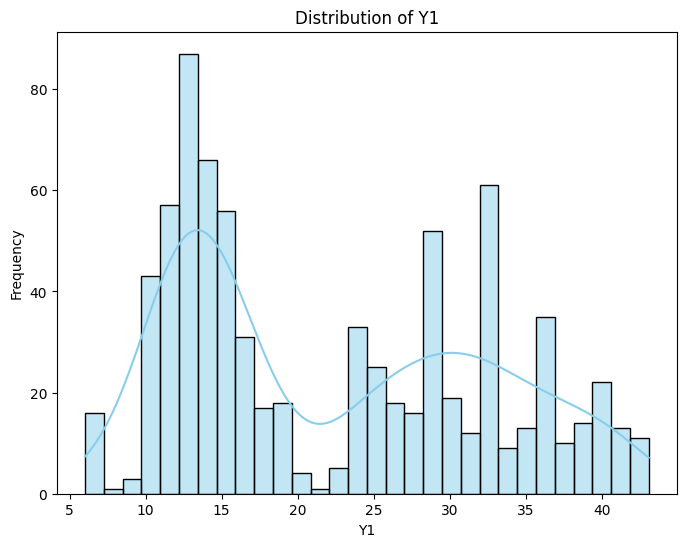

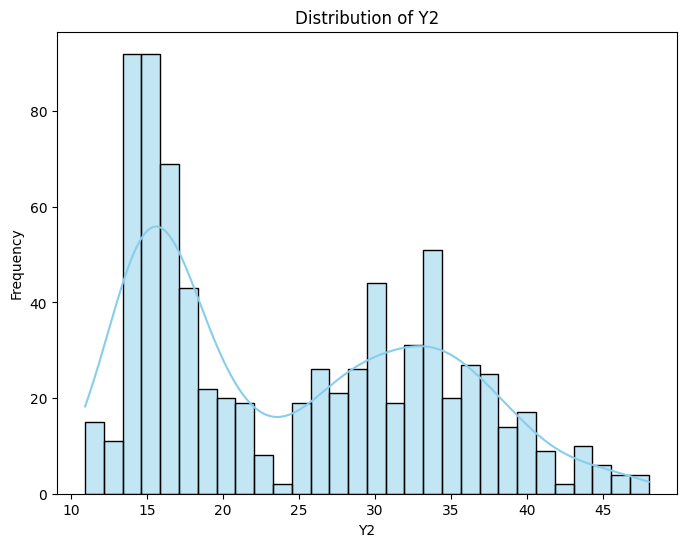

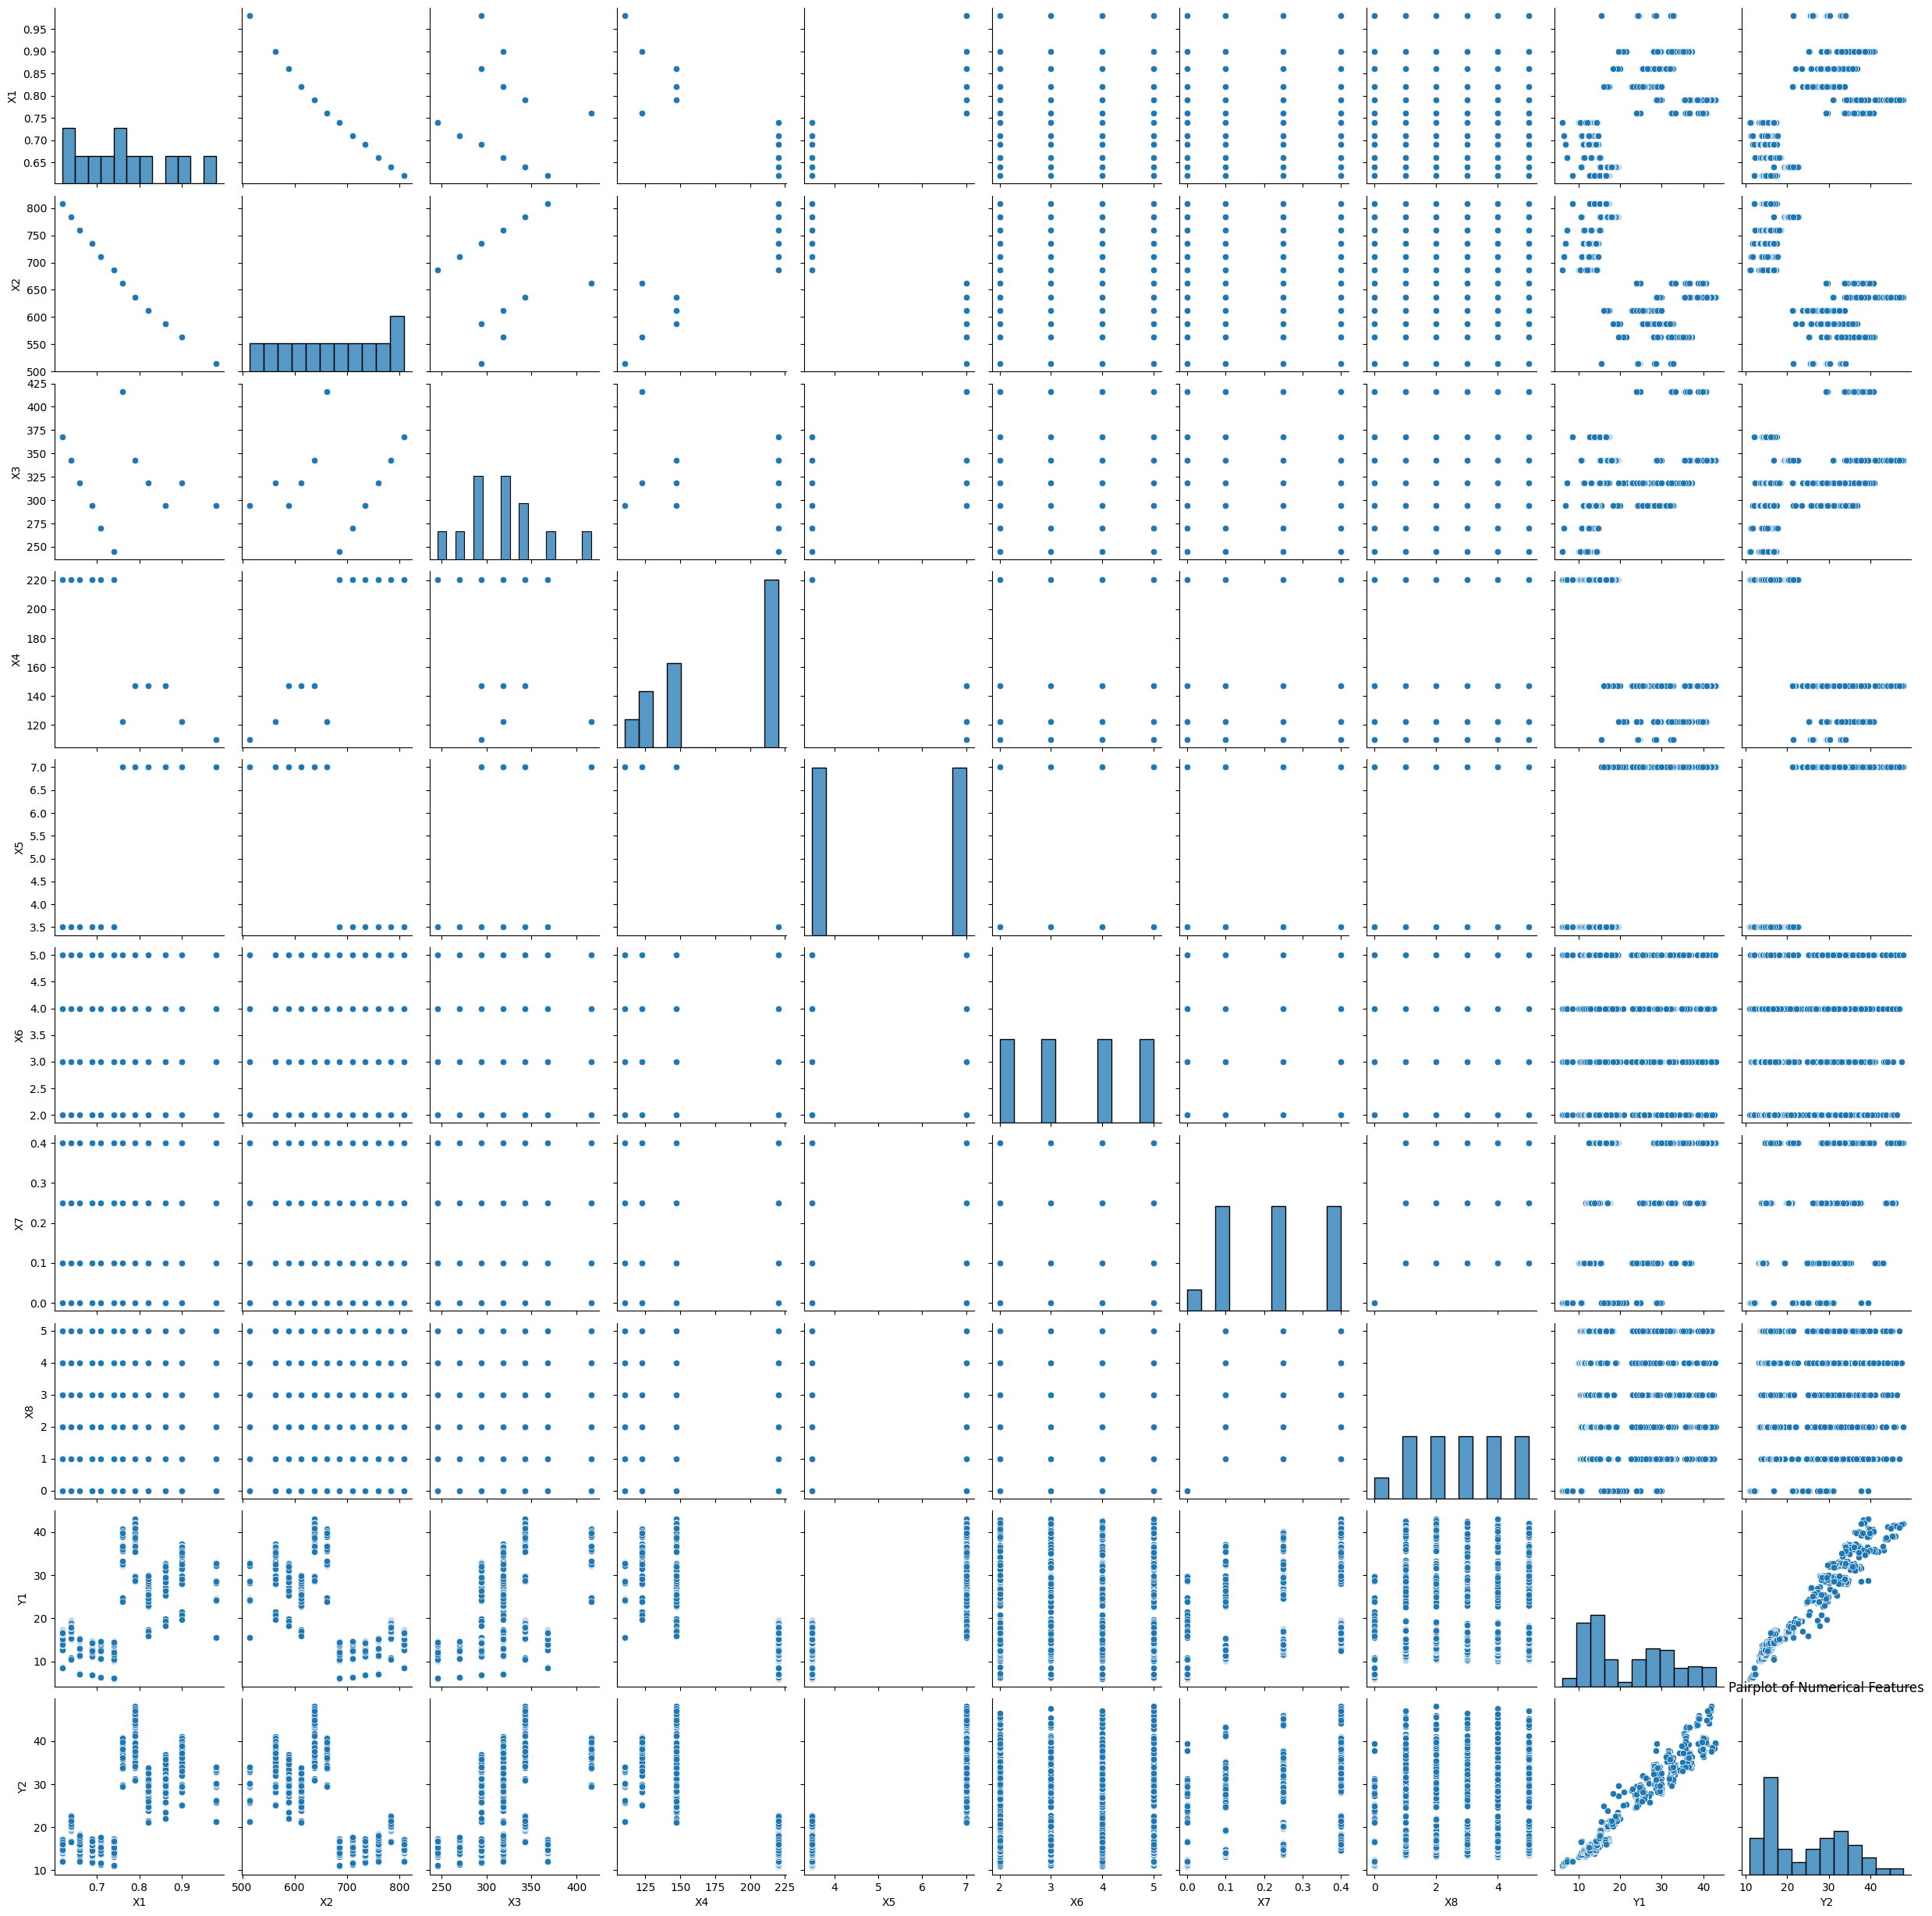

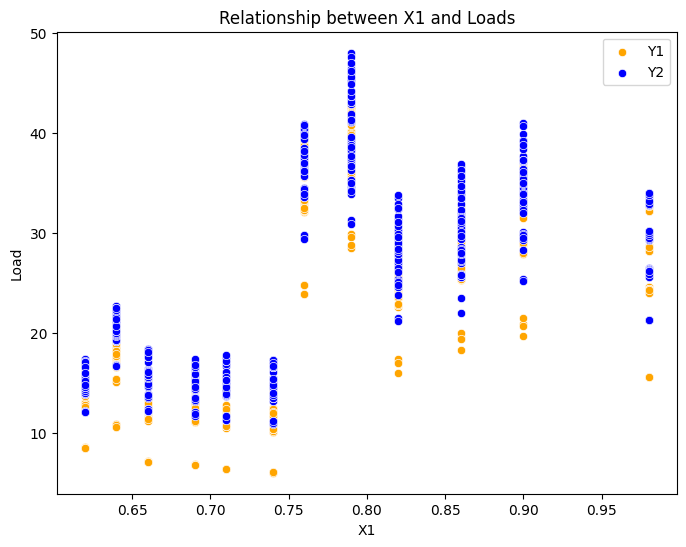

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv(r"C:\Users\kruth\Documents\VSCode\Project3\ENB2012_data.csv")

# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Checking for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Summarizing the data
print("\nDataset summary:")
print(data.describe())

# Checking data types
print("\nData types of each column:")
print(data.dtypes)

# Checking for correlations between features
correlation_matrix = data.corr()

# Displaying the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Visualizing the distribution of target variables (e.g., Y1 and Y2)
target_columns = ['Y1', 'Y2']  # Adjust based on your dataset
for column in target_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Pair plot to explore relationships between numerical features
sns.pairplot(data)
plt.title("Pairplot of Numerical Features")
plt.show()

# Identifying potential patterns
# For example, examining relationships between X1 and target variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['X1'], y=data['Y1'], color='orange', label='Y1')
sns.scatterplot(x=data['X1'], y=data['Y2'], color='blue', label='Y2')
plt.title("Relationship between X1 and Loads")
plt.xlabel("X1")
plt.ylabel("Load")
plt.legend()
plt.show()

## Experiment 1: Pre-Processing


In [6]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Since there are no missing values, we can proceed to feature selection and transformation

# Selecting features for the first experiment
# For this experiment, we will use all the features available in the dataset
selected_features = data.columns.tolist()
print("\nSelected features for the first experiment:")
print(selected_features)

# Transforming features if necessary
# In this dataset, all features are numerical, so no transformation is needed

# Creating new features if necessary
# For this experiment, we will not create any new features

# Display the pre-processed dataset
print("\nPre-processed dataset:")
print(data.head())


First few rows of the dataset:
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28

Missing values in each column:
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

Selected features for the first experiment:
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']

Pre-processed dataset:
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("ENB2012_data.csv")

# Define the features (X) and target variables (Y)
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y1 = data['Y1']
Y2 = data['Y2']

# Split the data into training and testing sets for Y1
X_train_Y1, X_test_Y1, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.2, random_state=42)

# Split the data into training and testing sets for Y2
X_train_Y2, X_test_Y2, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=42)

# Create a linear regression model for Y1
model_Y1 = LinearRegression()
model_Y1.fit(X_train_Y1, Y1_train)

# Predict the target variable Y1 using the test set
Y1_pred = model_Y1.predict(X_test_Y1)

# Evaluate the model for Y1
mse_Y1 = mean_squared_error(Y1_test, Y1_pred)
r2_Y1 = r2_score(Y1_test, Y1_pred)

print(f"Model for Y1 - Mean Squared Error: {mse_Y1}, R^2 Score: {r2_Y1}")

# Create a linear regression model for Y2
model_Y2 = LinearRegression()
model_Y2.fit(X_train_Y2, Y2_train)

# Predict the target variable Y2 using the test set
Y2_pred = model_Y2.predict(X_test_Y2)

# Evaluate the model for Y2
mse_Y2 = mean_squared_error(Y2_test, Y2_pred)
r2_Y2 = r2_score(Y2_test, Y2_pred)

print(f"Model for Y2 - Mean Squared Error: {mse_Y2}, R^2 Score: {r2_Y2}")


Model for Y1 - Mean Squared Error: 9.153187855202752, R^2 Score: 0.912184095154691
Model for Y2 - Mean Squared Error: 9.893427647944085, R^2 Score: 0.8932255268607288


## Experiment 1: Evaluation

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv("ENB2012_data.csv")

# Define the features (X) and target variables (Y)
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y1 = data['Y1']
Y2 = data['Y2']

# Split the data into training and testing sets for Y1
X_train_Y1, X_test_Y1, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.2, random_state=42)

# Split the data into training and testing sets for Y2
X_train_Y2, X_test_Y2, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=42)

# Create a linear regression model for Y1
model_Y1 = LinearRegression()
model_Y1.fit(X_train_Y1, Y1_train)

# Predict the target variable Y1 using the test set
Y1_pred = model_Y1.predict(X_test_Y1)

# Evaluate the model for Y1 using RMSE
rmse_Y1 = np.sqrt(mean_squared_error(Y1_test, Y1_pred))
print(f"Model for Y1 - Root Mean Squared Error (RMSE): {rmse_Y1}")

# Create a linear regression model for Y2
model_Y2 = LinearRegression()
model_Y2.fit(X_train_Y2, Y2_train)

# Predict the target variable Y2 using the test set
Y2_pred = model_Y2.predict(X_test_Y2)

# Evaluate the model for Y2 using RMSE
rmse_Y2 = np.sqrt(mean_squared_error(Y2_test, Y2_pred))
print(f"Model for Y2 - Root Mean Squared Error (RMSE): {rmse_Y2}")


Model for Y1 - Root Mean Squared Error (RMSE): 3.0254235827736173
Model for Y2 - Root Mean Squared Error (RMSE): 3.145381955811422


## Experiment 2

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv("ENB2012_data.csv")

# Define the features (X) and target variables (Y)
# Selecting a subset of features based on their correlation with the target variables
selected_features = ['X1', 'X2', 'X3', 'X4', 'X5']
X = data[selected_features]
Y1 = data['Y1']
Y2 = data['Y2']

# Split the data into training and testing sets for Y1
X_train_Y1, X_test_Y1, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.2, random_state=42)

# Split the data into training and testing sets for Y2
X_train_Y2, X_test_Y2, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model for Y1
model_Y1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_Y1.fit(X_train_Y1, Y1_train)

# Predict the target variable Y1 using the test set
Y1_pred = model_Y1.predict(X_test_Y1)

# Evaluate the model for Y1 using RMSE
rmse_Y1 = np.sqrt(mean_squared_error(Y1_test, Y1_pred))
print(f"Random Forest Model for Y1 - Root Mean Squared Error (RMSE): {rmse_Y1}")

# Create a Random Forest Regressor model for Y2
model_Y2 = RandomForestRegressor(n_estimators=100, random_state=42)
model_Y2.fit(X_train_Y2, Y2_train)

# Predict the target variable Y2 using the test set
Y2_pred = model_Y2.predict(X_test_Y2)

# Evaluate the model for Y2 using RMSE
rmse_Y2 = np.sqrt(mean_squared_error(Y2_test, Y2_pred))
print(f"Random Forest Model for Y2 - Root Mean Squared Error (RMSE): {rmse_Y2}")


Random Forest Model for Y1 - Root Mean Squared Error (RMSE): 3.0567881126817156
Random Forest Model for Y2 - Root Mean Squared Error (RMSE): 2.7580368129250377


## Experiment 3

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv("ENB2012_data.csv")

# Define the features (X) and target variables (Y)
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y1 = data['Y1']
Y2 = data['Y2']

# Split the data into training and testing sets for Y1
X_train_Y1, X_test_Y1, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.2, random_state=42)

# Split the data into training and testing sets for Y2
X_train_Y2, X_test_Y2, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=42)

# Create a Ridge regression model for Y1
model_Y1 = Ridge(alpha=1.0)
model_Y1.fit(X_train_Y1, Y1_train)

# Predict the target variable Y1 using the test set
Y1_pred = model_Y1.predict(X_test_Y1)

# Evaluate the model for Y1 using RMSE
rmse_Y1 = np.sqrt(mean_squared_error(Y1_test, Y1_pred))
print(f"Ridge Regression Model for Y1 - Root Mean Squared Error (RMSE): {rmse_Y1}")

# Create a Ridge regression model for Y2
model_Y2 = Ridge(alpha=1.0)
model_Y2.fit(X_train_Y2, Y2_train)

# Predict the target variable Y2 using the test set
Y2_pred = model_Y2.predict(X_test_Y2)

# Evaluate the model for Y2 using RMSE
rmse_Y2 = np.sqrt(mean_squared_error(Y2_test, Y2_pred))
print(f"Ridge Regression Model for Y2 - Root Mean Squared Error (RMSE): {rmse_Y2}")


Ridge Regression Model for Y1 - Root Mean Squared Error (RMSE): 3.107001364826063
Ridge Regression Model for Y2 - Root Mean Squared Error (RMSE): 3.2164108158552893
